## Ch06 モデル評価・検証をTitanic号のデータで練習する

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import Image
%matplotlib inline
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
sns.set_context("notebook")
plt.style.use('dark_background')

In [180]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [181]:
def get_unique(df,name):
    print('%s: %s'%(name, pd.unique(df[name])))

In [182]:
def get_dummy(df, keys):
    for key in keys:
        dummy = pd.get_dummies(df[key]).astype(np.int64)
        print("remove %s from %s"%(dummy.columns[0], key))
        dummy.columns = [key + '_' + i for i in dummy.columns]
        df = df.drop(key,axis=1)
        df = pd.concat([df, dummy.iloc[:,1:]], axis=1)
    return df

In [183]:
# df = sns.load_dataset('titanic')
df = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [184]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [185]:
np.bincount(df['Parch'])

array([678, 118,  80,   5,   4,   5,   1])

In [186]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [187]:
def male_female_child(passenger):
    # 年齢と性別のデータを取得します。
    age,sex = passenger
    # 年齢を調べて16歳未満なら、子供。それ以外は性別をそのまま返します。
    if age < 16:
        return 'child'
    else:
        return 'adult'
    
# personという新しい列を追加します。
df['person'] = df[['Age','Sex']].apply(male_female_child,axis=1)
df_test['person'] = df_test[['Age','Sex']].apply(male_female_child,axis=1)

In [188]:
df = df.drop(['Cabin','Ticket', 'Name'], axis=1)
df_test = df_test.drop(['Cabin','Ticket', 'Name'], axis=1)

In [189]:
df['Age'] = df['Age'].fillna(value=np.average(df['Age'].dropna()))
df_test['Age'] = df_test['Age'].fillna(value=np.average(df['Age'].dropna()))

In [190]:
df['Embarked'] = df['Embarked'].fillna(value='S')
df_test['Embarked'] = df_test['Embarked'].fillna(value='S')

In [191]:
df_test['Fare'] = df_test['Fare'].fillna(value=np.average(df['Fare']))

In [192]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null object
person         418 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [193]:
get_unique(df, 'Sex')
get_unique(df, 'Embarked')
get_unique(df, 'person')

Sex: ['male' 'female']
Embarked: ['S' 'C' 'Q']
person: ['adult' 'child']


In [194]:
keys = ['Sex', 'Embarked', 'person']
df_dummy = get_dummy(df, keys)
df_test_dummy= get_dummy(df_test, keys)

remove female from Sex
remove C from Embarked
remove adult from person
remove female from Sex
remove C from Embarked
remove adult from person


In [195]:
# df_dummy['alone'] = df_cp['alone'].map({True: 1, False: 0})
# df_cp['adult_male'] = df_cp['adult_male'].map({True: 1, False: 0})

In [196]:
# df_cp['class'] = df_cp['class'].map({'First': 1, 'Second': 2, 'Third': 3})

In [197]:
# df_cp = df_cp.drop('alive', axis=1)
# df_cp = df_cp.drop('pclass', axis=1)

In [198]:
# df_cp['age'] = df_cp['age'].fillna(value=np.average(df_cp['age'].dropna()))

In [199]:
print(df.columns)
print(df_test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'person'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'person'],
      dtype='object')


In [200]:
# values指定を忘れるとSeriesとして保管され、あとのsklearnの処理がうまくいかない
X_train = df_dummy.iloc[:,2:].values
y_train = df_dummy.iloc[:,1].values

In [206]:
X_test = df_test_dummy.iloc[:,1:].values
# y_test = df_test_dummy.iloc[:,1].values

In [202]:
y_test.shape

(418,)

In [14]:
# train とtestにsplit
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [141]:
# パイプライン
pipe_lr = make_pipeline(StandardScaler(),
                       LogisticRegression(random_state=1))
pipe_lr.fit(X_train, y_train)
# pipe_lr.score(X_test,y_test)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [142]:
# 層化k分割交差検証
from sklearn.model_selection import StratifiedKFold
sf = StratifiedKFold(n_splits=10, random_state=1)
kfold = sf.split(X_train, y_train)
trains = []
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f'%(k+1, np.bincount(y_train[train]), score))
    trains.append(train)

Fold:  1, Class dist.: [494 307], Acc: 0.800
Fold:  2, Class dist.: [494 307], Acc: 0.800
Fold:  3, Class dist.: [494 308], Acc: 0.787
Fold:  4, Class dist.: [494 308], Acc: 0.843
Fold:  5, Class dist.: [494 308], Acc: 0.809
Fold:  6, Class dist.: [494 308], Acc: 0.775
Fold:  7, Class dist.: [494 308], Acc: 0.787
Fold:  8, Class dist.: [494 308], Acc: 0.798
Fold:  9, Class dist.: [494 308], Acc: 0.831
Fold: 10, Class dist.: [495 308], Acc: 0.852


In [143]:
print('average score: %f'%(np.average(scores)))

average score: 0.808149


(0.6, 1.0)

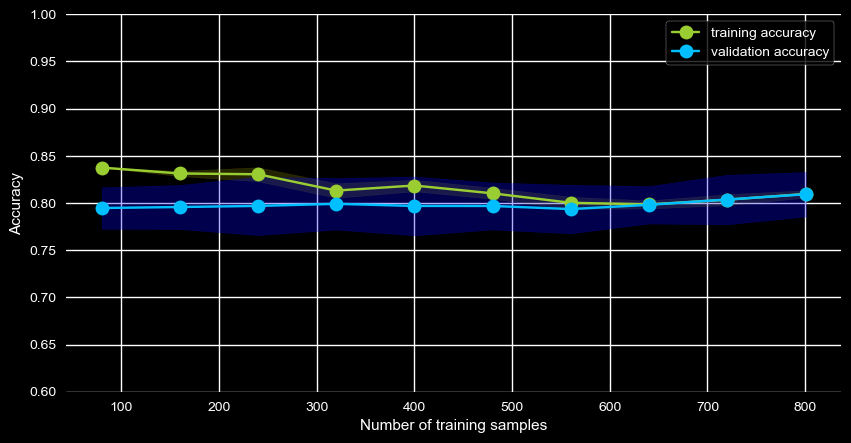

In [144]:
# 学習曲線
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                      X=X_train, y=y_train,
                                                      train_sizes=np.linspace(0.1,1.0,10 ),
                                                      cv = 10, n_jobs = 1)
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis=1)
fig = plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_sizes, train_mean, color='yellowgreen', 
         marker='o', markersize=10, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                alpha = 0.15, color='yellow')
plt.plot(train_sizes, test_mean, color='deepskyblue',
        marker='o', markersize=10, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                alpha = 0.3, color='blue')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='upper right', frameon=True)
plt.ylim([0.6, 1.0])

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]


(0.6, 1.0)

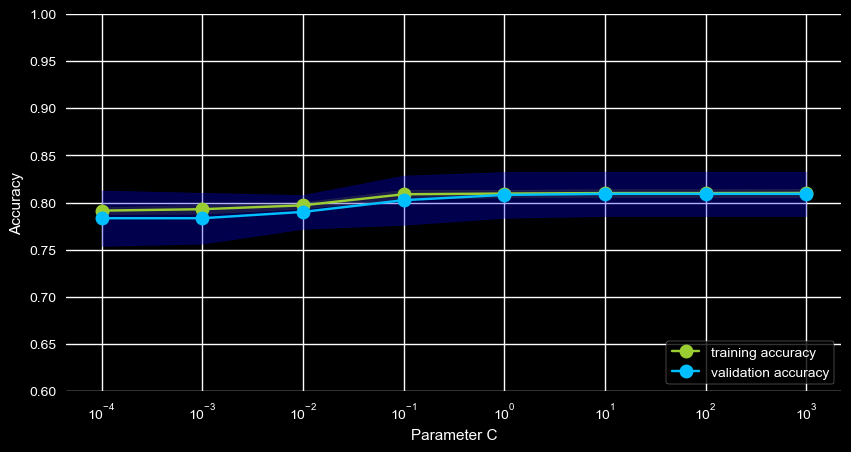

In [145]:
#検証曲線
from sklearn.model_selection import validation_curve
params = [10**(-4+i) for i in range(8)]
print(params)
train_scores, test_scores = validation_curve(estimator=pipe_lr,X=X_train, y=y_train,cv = 10,
                                             param_name='logisticregression__C',
                                             param_range=params)
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis=1)
fig = plt.figure(figsize=(10,5), dpi=100)
plt.plot(params, train_mean, color='yellowgreen', 
         marker='o', markersize=10, label='training accuracy')
plt.fill_between(params, train_mean + train_std, train_mean - train_std,
                alpha = 0.15, color='yellow')
plt.plot(params, test_mean, color='deepskyblue',
        marker='o', markersize=10, label='validation accuracy')
plt.fill_between(params, test_mean + test_std, test_mean - test_std,
                alpha = 0.3, color='blue')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right', frameon=True)
plt.xscale('log')
plt.ylim([0.6, 1.0])

In [146]:
### GridSearchを用いる
from sklearn.model_selection import GridSearchCV
params = [10**(-4+i) for i in range(8)]
param_grid = [{'logisticregression__C': params}]
gs = GridSearchCV(estimator=pipe_lr,param_grid=param_grid,
                 scoring='accuracy', cv=10, n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.best_score_)

{'logisticregression__C': 10}
0.8092031425364759


In [154]:
### SVM を試してみる
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1,verbose=10))
params = [10**(-4+i) for i in range(6)]
param_grid = [{'svc__C': params, 'svc__kernel': ['linear']},
             {'svc__C': params, 'svc__gamma': params, 'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,
                 scoring='accuracy', cv=10, n_jobs=4,verbose=10)

In [155]:
gs = gs.fit(X_train, y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits
[CV] svc__C=0.0001, svc__kernel=linear ...............................
[CV] svc__C=0.0001, svc__kernel=linear ...............................
[CV] svc__C=0.0001, svc__kernel=linear ...............................
[CV] svc__C=0.0001, svc__kernel=linear ...............................
[LibSVM][CV]  svc__C=0.0001, svc__kernel=linear, score=0.6111111111111112, total=   0.0s
[LibSVM][CV]  svc__C=0.0001, svc__kernel=linear, score=0.6179775280898876, total=   0.0s
[LibSVM][CV]  svc__C=0.0001, svc__kernel=linear, score=0.6111111111111112, total=   0.0s
[CV] svc__C=0.0001, svc__kernel=linear ...............................
[LibSVM][CV]  svc__C=0.0001, svc__kernel=linear, score=0.6179775280898876, total=   0.0s
[CV] svc__C=0.0001, svc__kernel=linear ...............................
[CV] svc__C=0.0001, svc__kernel=linear ...............................
[CV] svc__C=0.0001, svc__kernel=linear ...............................
[LibSVM][CV] 

[Parallel(n_jobs=4)]: Batch computation too fast (0.0805s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s


[LibSVM][CV]  svc__C=0.001, svc__kernel=linear, score=0.6966292134831461, total=   0.0s
[CV] svc__C=0.001, svc__kernel=linear ................................
[LibSVM][CV]  svc__C=0.01, svc__kernel=linear, score=0.7752808988764045, total=   0.0s
[CV] svc__C=0.01, svc__kernel=linear .................................
[LibSVM][CV]  svc__C=0.001, svc__kernel=linear, score=0.6292134831460674, total=   0.0s
[CV] svc__C=0.01, svc__kernel=linear .................................
[LibSVM][CV]  svc__C=0.001, svc__kernel=linear, score=0.6333333333333333, total=   0.0s
[CV] svc__C=0.01, svc__kernel=linear .................................
[LibSVM][CV]  svc__C=0.01, svc__kernel=linear, score=0.8426966292134831, total=   0.0s
[LibSVM][CV]  svc__C=0.001, svc__kernel=linear, score=0.6363636363636364, total=   0.0s
[LibSVM][CV]  svc__C=0.01, svc__kernel=linear, score=0.797752808988764, total=   0.0s
[CV] svc__C=0.01, svc__kernel=linear .................................
[CV] svc__C=0.1, svc__kernel=line

[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.3s


[LibSVM][CV]  svc__C=0.1, svc__kernel=linear, score=0.7865168539325843, total=   0.0s
[CV] svc__C=10, svc__kernel=linear ...................................
[LibSVM][CV] .......... svc__C=1, svc__kernel=linear, score=0.8, total=   0.1s
[CV] svc__C=1, svc__kernel=linear ....................................
[LibSVM][CV]  svc__C=1, svc__kernel=linear, score=0.797752808988764, total=   0.1s
[CV] svc__C=1, svc__kernel=linear ....................................
[LibSVM][CV]  svc__C=1, svc__kernel=linear, score=0.8202247191011236, total=   0.1s
[CV] svc__C=1, svc__kernel=linear ....................................
[LibSVM][CV]  svc__C=1, svc__kernel=linear, score=0.7888888888888889, total=   0.1s
[CV] svc__C=1, svc__kernel=linear ....................................
[LibSVM][CV]  svc__C=1, svc__kernel=linear, score=0.7613636363636364, total=   0.0s
[CV] svc__C=10, svc__kernel=linear ...................................
[LibSVM][CV]  svc__C=1, svc__kernel=linear, score=0.7865168539325843, tota

[Parallel(n_jobs=4)]: Done  44 tasks      | elapsed:    0.7s


[LibSVM][CV]  svc__C=0.0001, svc__gamma=0.0001, svc__kernel=rbf, score=0.6179775280898876, total=   0.0s
[CV] svc__C=0.0001, svc__gamma=0.0001, svc__kernel=rbf ...............
[LibSVM][CV]  svc__C=10, svc__kernel=linear, score=0.8539325842696629, total=   0.2s
[CV] svc__C=10, svc__kernel=linear ...................................
[LibSVM][CV]  svc__C=10, svc__kernel=linear, score=0.7640449438202247, total=   0.2s
[CV] svc__C=10, svc__kernel=linear ...................................
[LibSVM][CV]  svc__C=0.0001, svc__gamma=0.0001, svc__kernel=rbf, score=0.6179775280898876, total=   0.0s
[CV] svc__C=0.0001, svc__gamma=0.0001, svc__kernel=rbf ...............
[LibSVM][CV]  svc__C=10, svc__kernel=linear, score=0.7888888888888889, total=   0.2s
[CV] svc__C=0.0001, svc__gamma=0.0001, svc__kernel=rbf ...............
[LibSVM][CV]  svc__C=0.0001, svc__gamma=0.0001, svc__kernel=rbf, score=0.6179775280898876, total=   0.0s
[CV] svc__C=0.0001, svc__gamma=0.0001, svc__kernel=rbf ...............
[Lib

[Parallel(n_jobs=4)]: Done  72 tasks      | elapsed:    1.4s


[LibSVM][CV]  svc__C=0.0001, svc__gamma=0.01, svc__kernel=rbf, score=0.6179775280898876, total=   0.0s
[CV] svc__C=0.0001, svc__gamma=0.01, svc__kernel=rbf .................
[LibSVM][CV]  svc__C=0.0001, svc__gamma=0.01, svc__kernel=rbf, score=0.6136363636363636, total=   0.0s
[CV] svc__C=0.0001, svc__gamma=0.1, svc__kernel=rbf ..................
[LibSVM][CV]  svc__C=0.0001, svc__gamma=0.1, svc__kernel=rbf, score=0.6179775280898876, total=   0.0s
[CV] svc__C=0.0001, svc__gamma=0.1, svc__kernel=rbf ..................
[LibSVM][CV]  svc__C=0.0001, svc__gamma=0.01, svc__kernel=rbf, score=0.6179775280898876, total=   0.0s
[CV] svc__C=0.0001, svc__gamma=0.1, svc__kernel=rbf ..................
[LibSVM][CV]  svc__C=0.0001, svc__gamma=0.01, svc__kernel=rbf, score=0.6179775280898876, total=   0.0s
[CV] svc__C=0.0001, svc__gamma=1, svc__kernel=rbf ....................
[LibSVM][CV]  svc__C=0.0001, svc__gamma=0.1, svc__kernel=rbf, score=0.6111111111111112, total=   0.0s
[CV] svc__C=0.0001, svc__gamm

[Parallel(n_jobs=4)]: Done 108 tasks      | elapsed:    2.0s


[LibSVM][CV]  svc__C=0.001, svc__gamma=0.0001, svc__kernel=rbf, score=0.6179775280898876, total=   0.0s
[CV] svc__C=0.001, svc__gamma=0.0001, svc__kernel=rbf ................
[LibSVM][CV]  svc__C=0.001, svc__gamma=0.001, svc__kernel=rbf, score=0.6179775280898876, total=   0.0s
[CV] svc__C=0.001, svc__gamma=0.001, svc__kernel=rbf .................
[LibSVM][CV]  svc__C=0.001, svc__gamma=0.0001, svc__kernel=rbf, score=0.6179775280898876, total=   0.0s
[CV] svc__C=0.001, svc__gamma=0.001, svc__kernel=rbf .................
[LibSVM][CV]  svc__C=0.001, svc__gamma=0.0001, svc__kernel=rbf, score=0.6179775280898876, total=   0.0s
[CV] svc__C=0.001, svc__gamma=0.01, svc__kernel=rbf ..................
[LibSVM][CV]  svc__C=0.001, svc__gamma=0.0001, svc__kernel=rbf, score=0.6136363636363636, total=   0.0s
[CV] svc__C=0.001, svc__gamma=0.001, svc__kernel=rbf .................
[LibSVM][CV]  svc__C=0.001, svc__gamma=0.001, svc__kernel=rbf, score=0.6179775280898876, total=   0.1s
[CV] svc__C=0.001, svc_

[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    2.6s


[LibSVM][CV]  svc__C=0.001, svc__gamma=0.1, svc__kernel=rbf, score=0.6179775280898876, total=   0.0s
[CV] svc__C=0.001, svc__gamma=0.1, svc__kernel=rbf ...................
[LibSVM][CV]  svc__C=0.001, svc__gamma=1, svc__kernel=rbf, score=0.6111111111111112, total=   0.0s
[CV] svc__C=0.001, svc__gamma=1, svc__kernel=rbf .....................
[CV] svc__C=0.001, svc__gamma=0.1, svc__kernel=rbf ...................
[LibSVM][CV]  svc__C=0.001, svc__gamma=1, svc__kernel=rbf, score=0.6179775280898876, total=   0.0s
[CV] svc__C=0.001, svc__gamma=1, svc__kernel=rbf .....................
[LibSVM][CV]  svc__C=0.001, svc__gamma=0.1, svc__kernel=rbf, score=0.6136363636363636, total=   0.0s
[LibSVM][CV]  svc__C=0.001, svc__gamma=0.1, svc__kernel=rbf, score=0.6179775280898876, total=   0.0s
[CV] svc__C=0.001, svc__gamma=1, svc__kernel=rbf .....................
[CV] svc__C=0.001, svc__gamma=10, svc__kernel=rbf ....................
[LibSVM][CV]  svc__C=0.001, svc__gamma=1, svc__kernel=rbf, score=0.611111

[CV] svc__C=0.01, svc__gamma=0.01, svc__kernel=rbf ...................


[Parallel(n_jobs=4)]: Done 188 tasks      | elapsed:    3.4s


[LibSVM][CV]  svc__C=0.01, svc__gamma=0.01, svc__kernel=rbf, score=0.6179775280898876, total=   0.1s
[CV] svc__C=0.01, svc__gamma=0.01, svc__kernel=rbf ...................
[LibSVM][CV]  svc__C=0.01, svc__gamma=0.01, svc__kernel=rbf, score=0.6179775280898876, total=   0.0s
[CV] svc__C=0.01, svc__gamma=0.01, svc__kernel=rbf ...................
[LibSVM][CV]  svc__C=0.01, svc__gamma=0.1, svc__kernel=rbf, score=0.6179775280898876, total=   0.0s
[CV] svc__C=0.01, svc__gamma=0.1, svc__kernel=rbf ....................
[LibSVM][CV]  svc__C=0.01, svc__gamma=0.01, svc__kernel=rbf, score=0.6179775280898876, total=   0.0s
[CV] svc__C=0.01, svc__gamma=0.1, svc__kernel=rbf ....................
[LibSVM][CV]  svc__C=0.01, svc__gamma=0.01, svc__kernel=rbf, score=0.6136363636363636, total=   0.0s
[CV] svc__C=0.01, svc__gamma=0.1, svc__kernel=rbf ....................
[LibSVM][CV]  svc__C=0.01, svc__gamma=0.01, svc__kernel=rbf, score=0.6179775280898876, total=   0.0s
[CV] svc__C=0.01, svc__gamma=1, svc__ker

[Parallel(n_jobs=4)]: Done 232 tasks      | elapsed:    4.1s


[LibSVM][CV]  svc__C=0.1, svc__gamma=0.001, svc__kernel=rbf, score=0.6179775280898876, total=   0.0s
[CV] svc__C=0.1, svc__gamma=0.001, svc__kernel=rbf ...................
[LibSVM][CV]  svc__C=0.1, svc__gamma=0.0001, svc__kernel=rbf, score=0.6179775280898876, total=   0.0s
[LibSVM][CV]  svc__C=0.1, svc__gamma=0.0001, svc__kernel=rbf, score=0.6136363636363636, total=   0.0s
[CV] svc__C=0.1, svc__gamma=0.001, svc__kernel=rbf ...................
[CV] svc__C=0.1, svc__gamma=0.0001, svc__kernel=rbf ..................
[LibSVM][CV]  svc__C=0.1, svc__gamma=0.0001, svc__kernel=rbf, score=0.6179775280898876, total=   0.1s
[CV] svc__C=0.1, svc__gamma=0.001, svc__kernel=rbf ...................
[LibSVM][CV]  svc__C=0.1, svc__gamma=0.001, svc__kernel=rbf, score=0.6179775280898876, total=   0.0s
[CV] svc__C=0.1, svc__gamma=0.001, svc__kernel=rbf ...................
[LibSVM][CV]  svc__C=0.1, svc__gamma=0.0001, svc__kernel=rbf, score=0.6179775280898876, total=   0.0s
[CV] svc__C=0.1, svc__gamma=0.01, s

[CV] svc__C=0.1, svc__gamma=10, svc__kernel=rbf ......................
[CV] svc__C=0.1, svc__gamma=10, svc__kernel=rbf ......................
[LibSVM][CV]  svc__C=1, svc__gamma=0.0001, svc__kernel=rbf, score=0.6111111111111112, total=   0.0s
[CV] svc__C=1, svc__gamma=0.0001, svc__kernel=rbf ....................
[LibSVM][CV]  svc__C=0.1, svc__gamma=10, svc__kernel=rbf, score=0.6292134831460674, total=   0.0s
[CV] svc__C=0.1, svc__gamma=10, svc__kernel=rbf ......................
[LibSVM][CV]  svc__C=0.1, svc__gamma=10, svc__kernel=rbf, score=0.6333333333333333, total=   0.0s
[CV] svc__C=1, svc__gamma=0.0001, svc__kernel=rbf ....................
[LibSVM][CV]  svc__C=0.1, svc__gamma=10, svc__kernel=rbf, score=0.6067415730337079, total=   0.0s
[CV] svc__C=1, svc__gamma=0.0001, svc__kernel=rbf ....................
[LibSVM][CV]  svc__C=1, svc__gamma=0.0001, svc__kernel=rbf, score=0.6111111111111112, total=   0.0s
[CV] svc__C=1, svc__gamma=0.0001, svc__kernel=rbf ....................
[LibSVM][

[Parallel(n_jobs=4)]: Done 284 tasks      | elapsed:    5.1s


[LibSVM][CV]  svc__C=0.1, svc__gamma=10, svc__kernel=rbf, score=0.6179775280898876, total=   0.0s
[CV] svc__C=0.1, svc__gamma=10, svc__kernel=rbf ......................
[CV] svc__C=1, svc__gamma=0.0001, svc__kernel=rbf ....................
[LibSVM][CV]  svc__C=1, svc__gamma=0.0001, svc__kernel=rbf, score=0.6179775280898876, total=   0.0s
[CV] svc__C=1, svc__gamma=0.0001, svc__kernel=rbf ....................
[LibSVM][CV]  svc__C=1, svc__gamma=0.0001, svc__kernel=rbf, score=0.6179775280898876, total=   0.0s
[CV] svc__C=1, svc__gamma=0.0001, svc__kernel=rbf ....................
[LibSVM][CV]  svc__C=0.1, svc__gamma=10, svc__kernel=rbf, score=0.6136363636363636, total=   0.0s
[CV] svc__C=1, svc__gamma=0.001, svc__kernel=rbf .....................
[LibSVM][CV]  svc__C=1, svc__gamma=0.0001, svc__kernel=rbf, score=0.6179775280898876, total=   0.0s
[CV] svc__C=1, svc__gamma=0.0001, svc__kernel=rbf ....................
[LibSVM][CV]  svc__C=1, svc__gamma=0.0001, svc__kernel=rbf, score=0.6136363636

[CV] svc__C=1, svc__gamma=1, svc__kernel=rbf .........................


[Parallel(n_jobs=4)]: Done 336 tasks      | elapsed:    5.9s


[LibSVM][CV]  svc__C=1, svc__gamma=10, svc__kernel=rbf, score=0.6777777777777778, total=   0.1s
[CV] svc__C=1, svc__gamma=10, svc__kernel=rbf ........................
[LibSVM][CV]  svc__C=1, svc__gamma=10, svc__kernel=rbf, score=0.7752808988764045, total=   0.0s
[LibSVM][CV]  svc__C=1, svc__gamma=10, svc__kernel=rbf, score=0.7528089887640449, total=   0.1s
[CV] svc__C=1, svc__gamma=10, svc__kernel=rbf ........................
[CV] svc__C=1, svc__gamma=10, svc__kernel=rbf ........................
[LibSVM][CV]  svc__C=1, svc__gamma=1, svc__kernel=rbf, score=0.7640449438202247, total=   0.0s
[CV] svc__C=10, svc__gamma=0.0001, svc__kernel=rbf ...................
[LibSVM][CV]  svc__C=1, svc__gamma=10, svc__kernel=rbf, score=0.7, total=   0.0s
[CV] svc__C=10, svc__gamma=0.0001, svc__kernel=rbf ...................
[LibSVM][CV]  svc__C=1, svc__gamma=10, svc__kernel=rbf, score=0.7865168539325843, total=   0.0s
[CV] svc__C=1, svc__gamma=10, svc__kernel=rbf ........................
[LibSVM][CV]  

[CV] svc__C=10, svc__gamma=0.1, svc__kernel=rbf ......................
[LibSVM][CV]  svc__C=10, svc__gamma=1, svc__kernel=rbf, score=0.8111111111111111, total=   0.1s
[CV] svc__C=10, svc__gamma=1, svc__kernel=rbf ........................
[LibSVM][CV]  svc__C=10, svc__gamma=0.1, svc__kernel=rbf, score=0.8202247191011236, total=   0.0s
[CV] svc__C=10, svc__gamma=1, svc__kernel=rbf ........................
[LibSVM][CV]  svc__C=10, svc__gamma=1, svc__kernel=rbf, score=0.8314606741573034, total=   0.1s
[CV] svc__C=10, svc__gamma=1, svc__kernel=rbf ........................
[LibSVM][CV]  svc__C=10, svc__gamma=0.1, svc__kernel=rbf, score=0.8522727272727273, total=   0.0s
[CV] svc__C=10, svc__gamma=10, svc__kernel=rbf .......................
[LibSVM][CV]  svc__C=10, svc__gamma=1, svc__kernel=rbf, score=0.7415730337078652, total=   0.1s
[CV] svc__C=10, svc__gamma=1, svc__kernel=rbf ........................
[LibSVM][CV]  svc__C=10, svc__gamma=1, svc__kernel=rbf, score=0.8426966292134831, total=  

[Parallel(n_jobs=4)]: Done 420 out of 420 | elapsed:    7.4s finished


In [158]:
print('best parameter is: %s'%(gs.best_params_))
print('best score is: %s'%(gs.best_score_))

best parameter is: {'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
best score is: 0.8260381593714927


In [149]:
parameters = [mat[0] for mat in gs.grid_scores_]
score = [mat[1] for mat in gs.grid_scores_]
svc_lin_C = parameters[:len(params)]
svc_lin_C = [c['svc__C'] for c in parameters[:len(params)]]
svc_lin_score = score[:len(params)]
df_lin = pd.DataFrame(np.c_[svc_lin_C, svc_lin_score],columns=['C', 'score'])
svc_kernel_C = [c['svc__C'] for c in parameters[len(params):]]
svc_kernel_gamma = [g['svc__gamma'] for g in parameters[len(params):]]
svc_lin_score = score[len(params):]
df_kernel = pd.DataFrame(np.c_[svc_kernel_C,svc_kernel_gamma, svc_lin_score],columns=['C', 'gamma','score'])

/Users/yugi/.pyenv/versions/anaconda-4.0.0/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/Users/yugi/.pyenv/versions/anaconda-4.0.0/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [150]:
kernel_max = df_kernel.loc[df_kernel['score'].idxmax(),:]
lin_max = df_lin.loc[df_lin['score'].idxmax(),:]
df_kernel.head()

,C,gamma,score
0,0.0001,0.0001,0.616162
1,0.0001,0.0010,0.616162
2,0.0001,0.0100,0.616162
3,0.0001,0.1000,0.616162
4,0.0001,1.0000,0.616162


Text(0.5,1,'SVC kernel parameter validation curve')

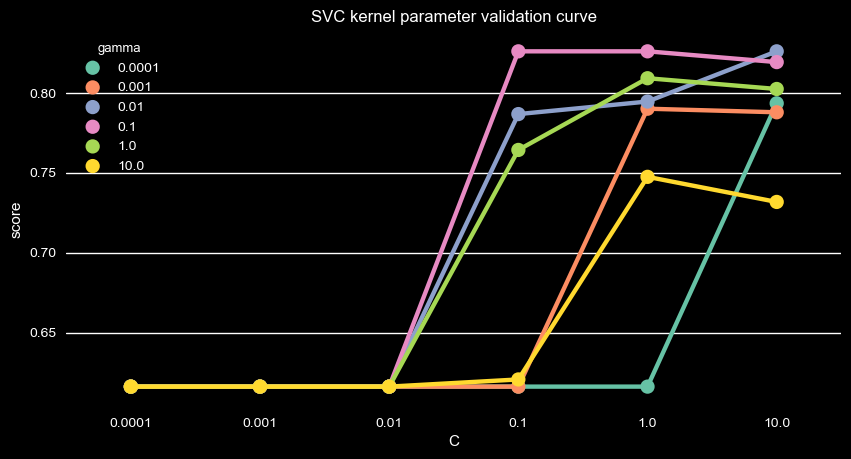

In [151]:
fig = plt.figure(figsize=(10,5), dpi=100)
g = sns.pointplot(x='C', y='score', data=df_kernel, hue='gamma', palette='Set2')
g.set_title('SVC kernel parameter validation curve')

Text(0.5,1,'SVC linear parameter validation curve')

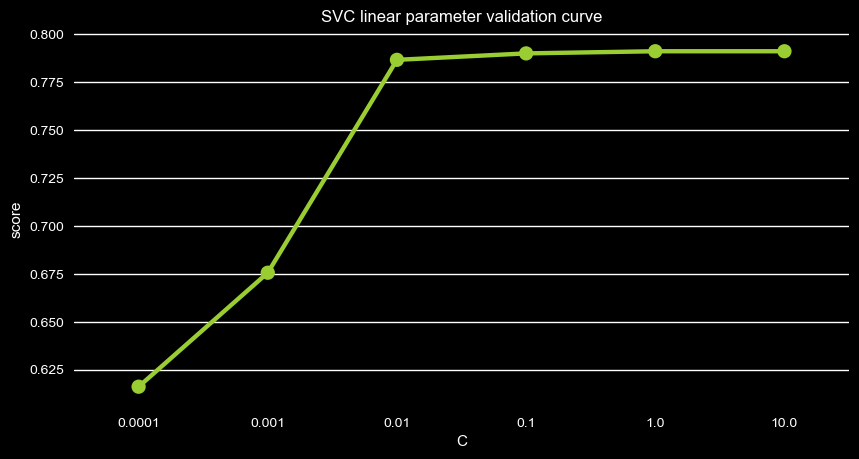

In [152]:
fig = plt.figure(figsize=(10,5), dpi=100)
g = sns.pointplot(x='C', y='score', data=df_lin, color='yellowgreen')
g.set_title('SVC linear parameter validation curve')

In [159]:
### モデル検証
from sklearn.model_selection import cross_val_score
pipe_lr = make_pipeline(StandardScaler(),
                       LogisticRegression(random_state=1))
params_lr = [10**(-4+i) for i in range(6)]
param_grid_lr = [{'logisticregression__C': params_lr}]

pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1,verbose=10))
params_svc = [10**(-4+i) for i in range(6)]
param_grid_svc = [{'svc__C': params_svc, 'svc__kernel': ['linear']},
             {'svc__C': params_svc, 'svc__gamma': params_svc, 'svc__kernel': ['rbf']}]

from sklearn.tree import DecisionTreeClassifier
pipe_tree = make_pipeline(DecisionTreeClassifier(random_state=0))
params_tree = [{'max_depth': [1,2,3,4,5,6,7,None]}]

In [160]:
### LinearRegression
gs = GridSearchCV(estimator=pipe_lr,param_grid=param_grid_lr,
                 scoring='accuracy', cv=2, n_jobs=-1)
gs = gs.fit(X_train, y_train)
scores = cross_val_score(gs, X_train, y_train,scoring='accuracy', cv=5)
print(' Linear Regression')
print('average: %f, variation: %f'% (np.mean(scores), np.std(scores)))
print('best is %s'% gs.best_params_)

 Linear Regression
average: 0.792396, variation: 0.017445
best is {'logisticregression__C': 1}


In [174]:
### SVM
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid_svc,
                 scoring='accuracy', cv=2, n_jobs=-1)
gs = gs.fit(X_train, y_train)
scores = cross_val_score(gs, X_train, y_train,scoring='accuracy', cv=5)
print(' Support Vector Machine')
print('average: %f, variation: %f'% (np.mean(scores), np.std(scores)))
print('best is %s'% gs.best_params_)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM] Support Vector Machine
average: 0.820058, variation: 0.031090
best is {'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [162]:
### Decision Tree
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=params_tree,
                 scoring='accuracy', cv=2, n_jobs=-1)
gs.fit(X_train,y_train)
scores = cross_val_score(gs, X_train, y_train,scoring='accuracy', cv=5)
print(' Decision Tree')
print('average: %f, variation: %f'% (np.mean(scores), np.std(scores)))
print('best is %s'% gs.best_params_)

 Decision Tree
average: 0.799138, variation: 0.024064
best is {'max_depth': 1}


In [165]:
# train とtestにsplit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [166]:
### Confusion Matrix
pipe_lr = make_pipeline(StandardScaler(),
                       LogisticRegression(random_state=1, C=10))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
result = confusion_matrix(y_true=y_test, y_pred=y_pred)
PRE = precision_score(y_true=y_test, y_pred=y_pred)
REC = recall_score(y_true=y_test, y_pred=y_pred)
F1 = f1_score(y_true=y_test, y_pred=y_pred)
print(PRE)
print(REC)
print(F1)

0.7741935483870968
0.6956521739130435
0.732824427480916


Text(10.2222,0.5,'true label')

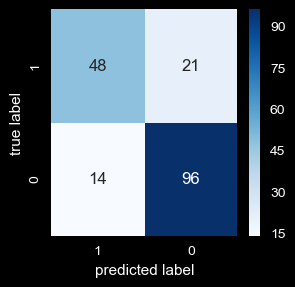

In [167]:
fig = plt.figure(figsize=(3,3), dpi=100)
g = sns.heatmap(result, annot=True, cmap='Blues')
g.invert_xaxis()
g.invert_yaxis()
g.set_xlabel('predicted label')
g.set_ylabel('true label')

In [168]:
### グリッドサーチの検証にF1値を使用
from sklearn.metrics import make_scorer, f1_score
my_score = make_scorer(f1_score, pos_label=0)
gs = GridSearchCV(estimator=pipe_lr,param_grid=param_grid_lr,
                 scoring=my_score, cv=10, n_jobs=-1)
gs = gs.fit(X_train, y_train)
print('best score(f1) is %f'%gs.best_score_)
print('best parameter is %s'% gs.best_params_)

best score(f1) is 0.846075
best parameter is {'logisticregression__C': 10}


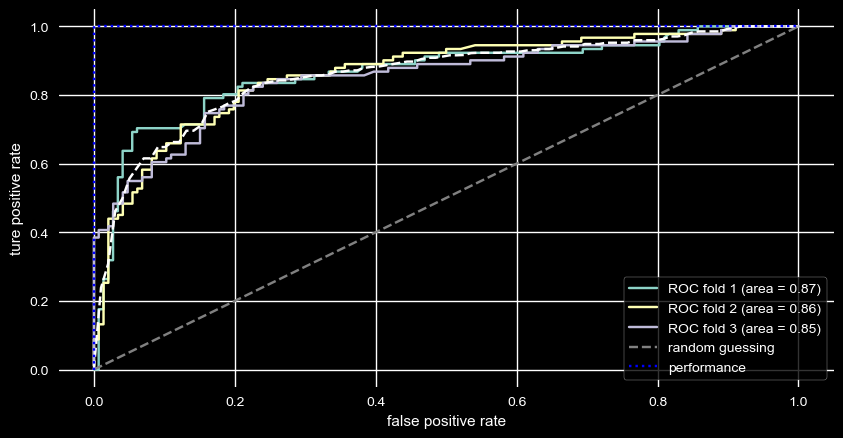

In [169]:
#ROC 曲線
from sklearn.metrics import roc_curve,auc
from scipy import interp
cv = list(StratifiedKFold(n_splits=3, random_state=1).split(X_train, y_train))
mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)
all_tpr = []
fig = plt.figure(figsize=(10,5), dpi=100)
for i,(train, test) in enumerate(cv):
    fit = pipe_lr.fit(X_train[train], y_train[train])
    probas = fit.predict_proba(X_train[test])
    fpr, tpr, thresholds = roc_curve(y_train[test], probas[:,1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC fold %d (area = %0.2f)'%(i+1, roc_auc))

#当て推量
plt.plot([0,1], [0,1], linestyle='--', color='grey', label = 'random guessing')

#FRP, TRP, ROC AUC それぞれの平均を計算してプロット
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', color='white')

#完全に予測が正解したとき
plt.plot([0,0,1],[0,1,1],linestyle=':', color='blue', label = 'performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('ture positive rate')
plt.legend(loc='lower right', frameon=True)

In [170]:
### PCAによる次元圧縮での評価　<敢えてパイプラインは使わない>
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

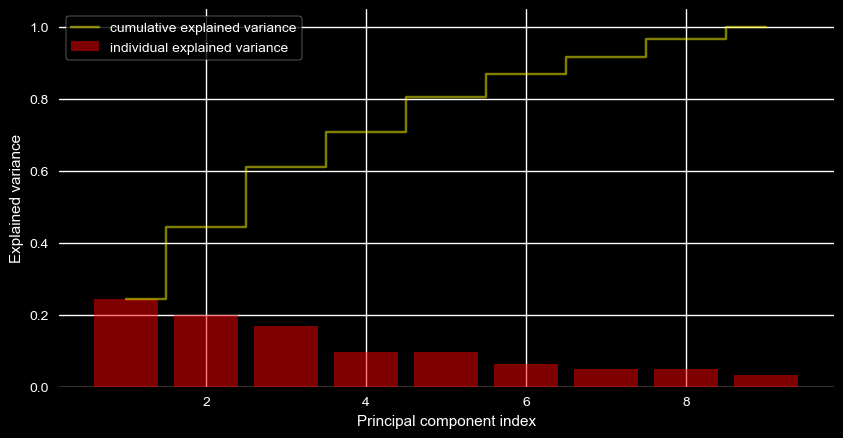

In [171]:
cov_mat = np.cov(X_train_std.T)

eigen_val, eigen_vec = np.linalg.eig(cov_mat)
eigen_val

### 全分散と説明分散→各固有値の大きさの比率

total = np.sum(eigen_val)
var_exp = [i / total for i in sorted(eigen_val, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

fig = plt.figure(figsize=(10,5),dpi=100)
plt.bar(range(1,cum_var_exp.shape[0]+1), var_exp, alpha=0.5, color='red', align = 'center', label='individual explained variance')
plt.step(range(1,cum_var_exp.shape[0]+1), cum_var_exp, alpha=0.5, color='yellow', where='mid', label = 'cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component index')
plt.legend(loc='best', frameon=True, edgecolor="white")

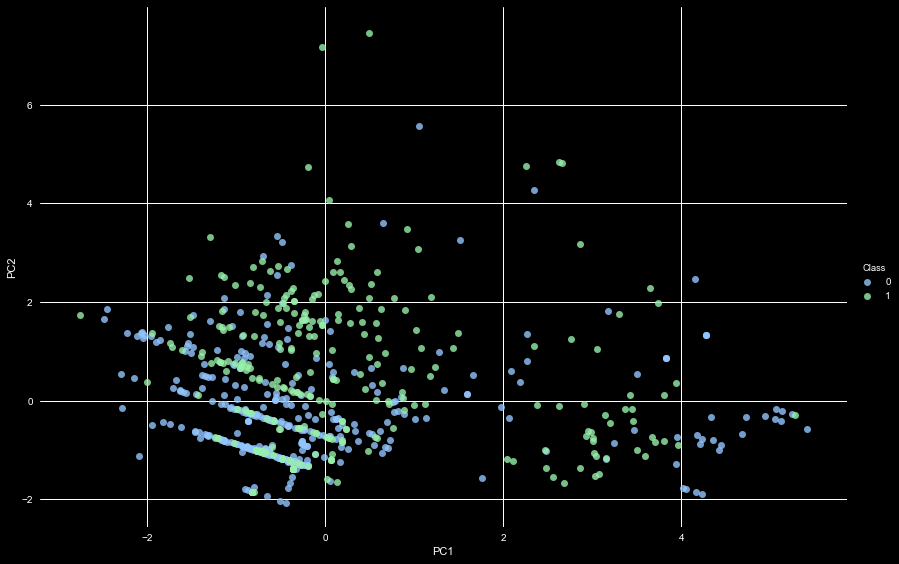

In [172]:
df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
df['Class'] = pd.DataFrame(np.array(y_train),index=None)

sns.lmplot(x='PC1', y='PC2', data=df, hue='Class', palette='pastel', fit_reg=False, 
           size=8, aspect=1.5)

In [173]:
### モデル検証
from sklearn.model_selection import cross_val_score
pipe_lr = make_pipeline(StandardScaler(),PCA(n_components=4),
                       LogisticRegression(random_state=1))
params_lr = [10**(-4+i) for i in range(6)]
param_grid_lr = [{'logisticregression__C': params_lr}]

### LinearRegression
gs = GridSearchCV(estimator=pipe_lr,param_grid=param_grid_lr,
                 scoring='accuracy', cv=2, n_jobs=-1)
gs = gs.fit(X_train, y_train)
scores = cross_val_score(gs, X_train, y_train,scoring='accuracy', cv=5)
print(' Linear Regression')
print('average: %f, variation: %f'% (np.mean(scores), np.std(scores)))
print('best is %s'% gs.best_params_)

 Linear Regression
average: 0.756943, variation: 0.019603
best is {'logisticregression__C': 10}


In [176]:
### SVM

pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1,verbose=10))
params_svc = [10**(-4+i) for i in range(6)]
param_grid_svc = [{'svc__C': params_svc, 'svc__kernel': ['linear']},
             {'svc__C': params_svc, 'svc__gamma': params_svc, 'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid_svc,
                 scoring='accuracy', cv=2, n_jobs=-1)
gs = gs.fit(X_train, y_train)
scores = cross_val_score(gs, X_train, y_train,scoring='accuracy', cv=5)
print(' Support Vector Machine')
print('average: %f, variation: %f'% (np.mean(scores), np.std(scores)))
print('best is %s'% gs.best_params_)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM] Support Vector Machine
average: 0.820058, variation: 0.031090
best is {'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [207]:
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1,verbose=10, C=10, gamma=0.01, kernel='rbf'))
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)

[LibSVM]

In [210]:
y_pred_df = pd.Series(y_pred)
y_pred_df.to_csv('result.csv')